#### CMSE 202 Honors Project
### &#9989; Joseph Chung and Connor Bergman



# Predicting Cryptocurrency Prices

## 1.1 Background and Motivation

#### 1.1.1 Personal Motivation

When first launced, BitCoin started off at just around a few dollars per coin back in 2009, allowing the loyal miners (mostly college students) to buy a slice of pizza. However, in just eight years, BitCoin broke $20000 per coin, leaving many baffled, and some very rich, almost becoming a household name for many investors, businesses, and financial advisors.

Following from above, cryptocurrency has been on the rise gaining traction in the world. Regardless of the motivation, people want to be able to predict the prices of such cryptocurrency so that they are able to create profit off of this. However, just like the stock market on Wall Street, cryptocurrency fluctuates in value. We will be looking at a few models and see their performance in predicting prices for the two most popular cryptocurrencies, BitCoin and Ethereum. In addition to their popularity and dominance in the sector, having longer runs compared to other options out in the market allow for more patterns to be discerened by such models. I am interested in predicting the prices so that I could help clients make smart investments in cryptocurrency using more efficient and precise predictions.


# 1.2 Methodology

This section here does not necessarily contain all of the methodlogies used, especially the execution and set up of the Random Walk and LSTM models. It has been included that set-up in the results and discussion for the facilitation of order and logical flow for the reader.

The models used are Random-Walks and Long Short Term Memory via Tensorflow. These two models were selected because I came upon this article. I wanted to observe the Mean Absolute Error (MAE) between the two models, as Random-Walks is computationally less expensive than LSTM. 

LSTM is an artificial rerecurrent neural network (RNN) where it can keep track of arbitrary long-term dependencies in the input sequences. Ideally, it should work well in these scenarios where it has to accumulate patterns over time. Using a sequential model, this neural network comprises of linear stacks that try to recognize a certain pattern going on. Random walks were also used as a stochastic process, similar to the base benchmark, or a more "simple" model one could use in this case and is computationally efficacious.

In order for such models to run, the data first must be prepared. Once the data is prepared and organized, which includes making the dataframe columns into the accordingly data type (i.e integer, datetime, etc), then the data must be trained and subsequently tested. This allows for a model to be created during the training phase, and then the predicted models are then further tested in the testing phase. This allows for evaluation in whether the model is oeprating properly or not. In addition, finding and graphing out the mean average error (MAE) allows for the visualization of accuracy of the model as well.

#### 1.2.1 Setting Up the Data
But in order to even start, here, we will be importing a few packages and our data.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

This allows updates for tensorflow- tensorflow had some revisions and the updates work much nicer.

In [2]:
!conda install tensorflow

^C


More packages were installed here. The data was then imported to a csv file from the websites below.

In [2]:

import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

#https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end
#https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end

This is the dataset for bitcoin. The dataset initially had commas for the large numbers in the "Volume" and "Market Cap" columns, but using a bash script, the commas were expunged from the numbers from the dataset as well as other weird characters. Data was only considered up to November 27th, 2019 because my phone would start to not run properly when trying to run this on jupyterhub. In addition, the dat

In [3]:
bitcoin_prices = pd.read_csv('Bitcoin - Sheet1.csv')

In [4]:
bitcoin_prices.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,27-Nov-19,7220.88,7619.69,6974.17,7531.66,23991412764,136102712894
1,26-Nov-19,7145.16,7320.23,7098.57,7218.37,21129505542,130429018720
2,25-Nov-19,7039.98,7319.86,6617.17,7146.13,42685231262,129112952930
3,24-Nov-19,7398.63,7408.58,7029.29,7047.92,30433517289,127327398565
4,23-Nov-19,7296.16,7442.26,7151.42,7397.80,21008924418,133636205957


This is testing to see if the numbers came in intergers

In [5]:
bitcoin_prices['Market Cap'][0]

136102712894

Here, the data was converted into the types that were desired. The dates in the file were converted to datetime types and negative volumes were set to zero next because it could throw off possible calcuations later on as well as create unwanted "divots" or anomalies. In addition, there typically is not a negative volume in the market in general, so it is also impractical. 

Then, the data under the "Volume" colume were converted to integers and the titles of each column were tidied up as well.

In [6]:
bitcoin_prices = bitcoin_prices.assign(Date=pd.to_datetime(bitcoin_prices['Date']))
bitcoin_prices.loc[bitcoin_prices['Volume']=="-",'Volume']=0
bitcoin_prices['Volume'] = bitcoin_prices['Volume'].astype("int64")
bitcoin_prices.columns = bitcoin_prices.columns.str.replace("*", "")
bitcoin_prices.head()

C:\Users\chjoe\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-11-27,7220.88,7619.69,6974.17,7531.66,23991412764,136102712894
1,2019-11-26,7145.16,7320.23,7098.57,7218.37,21129505542,130429018720
2,2019-11-25,7039.98,7319.86,6617.17,7146.13,42685231262,129112952930
3,2019-11-24,7398.63,7408.58,7029.29,7047.92,30433517289,127327398565
4,2019-11-23,7296.16,7442.26,7151.42,7397.80,21008924418,133636205957


The same was done for the Ethereum dataset.

In [7]:
eth_prices = pd.read_csv('Ethereum - Sheet1.csv')
ethereum_prices = eth_prices.assign(Date=pd.to_datetime(eth_prices['Date']))
eth_prices.loc[eth_prices['Volume']=="-",'Volume']=0
eth_prices['Volume'] = eth_prices['Volume'].astype("int64")
eth_prices.columns = eth_prices.columns.str.replace("*", "")
eth_prices.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,27-Nov-19,148.40,154.89,143.53,153.01,8778095308,16634910472
1,26-Nov-19,146.40,150.00,145.22,148.97,7648516297,16193326033
2,25-Nov-19,142.70,150.21,133.80,146.48,10962753356,15921080564
3,24-Nov-19,153.43,153.97,142.83,142.83,7782769098,15523459920
4,23-Nov-19,150.21,154.10,147.60,153.42,8289198330,16671705910


We import sys, PIL from the Image package, and io packages to upload the Ethereum and Bitcoin logos for certain graphs in the future. This will allow for the viewers to not be confused between which one is Ethereum and which one is Bitcoin's data being represented by the graph.

In [8]:
import sys
from PIL import Image
import io

if sys.version_info[0] < 3:
    import urllib2 as urllib
    bt_img = urllib.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")
else:
    import urllib
    bt_img = urllib.request.urlopen("http://logok.org/wp-content/uploads/2016/10/Bitcoin-Logo-640x480.png")
    eth_img = urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Ethereum_logo_2014.svg/256px-Ethereum_logo_2014.svg.png")

image_file = io.BytesIO(bt_img.read())
bitcoin_im = Image.open(image_file)

image_file = io.BytesIO(eth_img.read())
eth_im = Image.open(image_file)
width_eth_im , height_eth_im  = eth_im.size
eth_im = eth_im.resize((int(eth_im.size[0]*0.8), int(eth_im.size[1]*0.8)), Image.ANTIALIAS)

We now will edit the column names in each dataset to prepare for the merging full dataset that will be used for the models.

In [9]:
bitcoin_prices.columns =[bitcoin_prices.columns[0]]+['bt_'+i for i in bitcoin_prices.columns[1:]]
eth_prices.columns =[eth_prices.columns[0]]+['eth_'+i for i in eth_prices.columns[1:]]

In [10]:
bitcoin_prices.columns

Index(['Date', 'bt_Open', 'bt_High', 'bt_Low', 'bt_Close', 'bt_Volume',
       'bt_Market Cap'],
      dtype='object')

Below, graphs were created to show the historical prices and volumes of Bitcoin and Ethereum respectively. The top subplots of Bitcoin and Ethereum do not have x-axis ticks so that the viewer would consciously compared the volume in the market and the respective coin offering, or simply, price value of the coin.

C:\Users\chjoe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


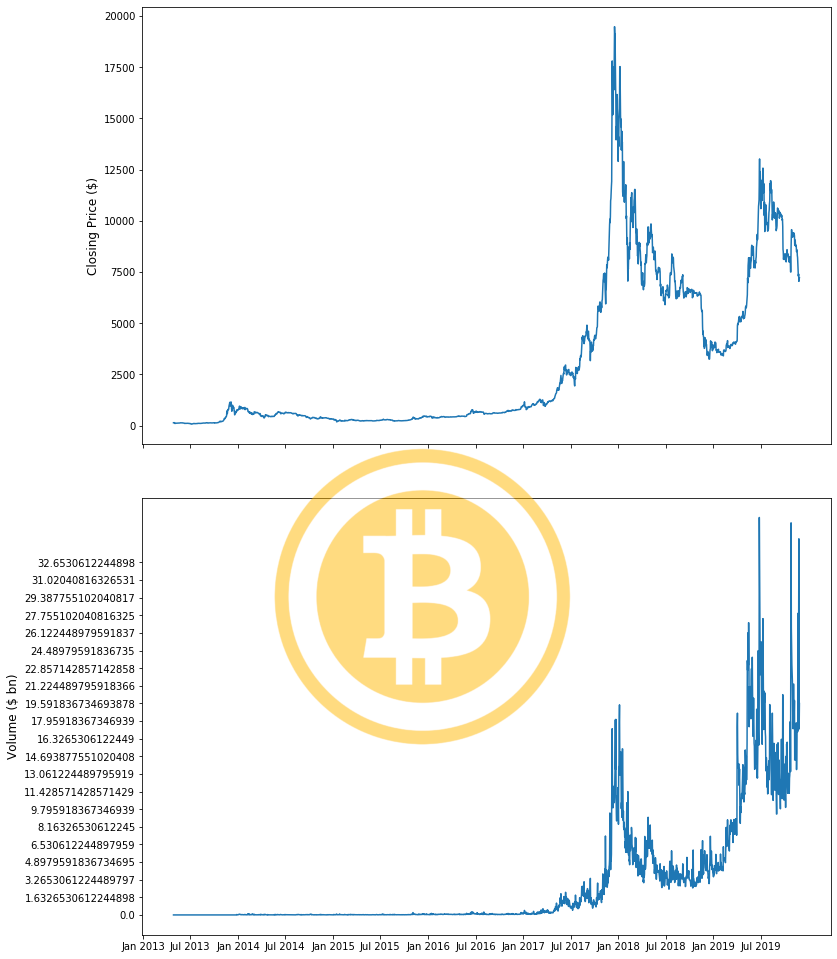

In [11]:
y = np.linspace(0,40,21)
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in y])
ax2.set_yticklabels(2*np.linspace(0,40))
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(bitcoin_prices['Date'],bitcoin_prices['bt_Open'])
ax2.plot(bitcoin_prices['Date'].values, bitcoin_prices['bt_Volume'].values)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.figimage(bitcoin_im, 100, 120, zorder=0.5,alpha=.5)
plt.show()

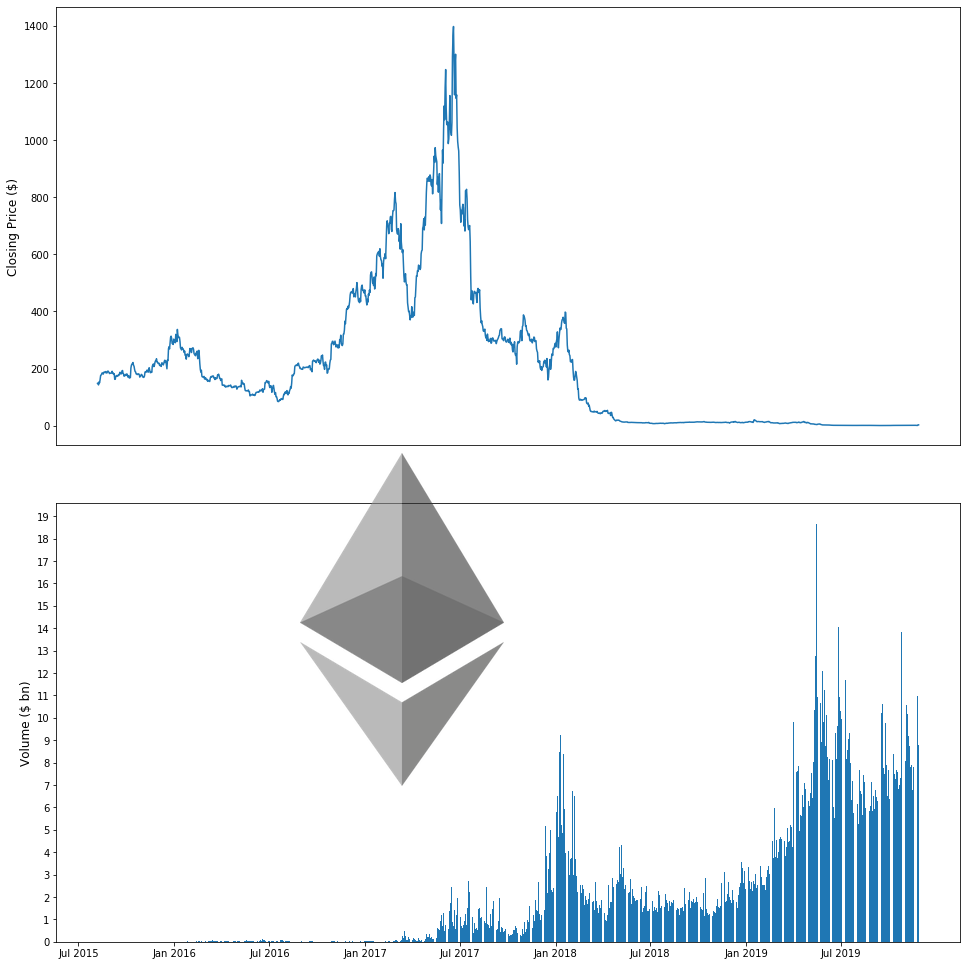

In [12]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[1, 1]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(40)])
ax2.set_yticklabels(range(20))
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(eth_prices['Date'],eth_prices['eth_Open'])
ax2.bar(eth_prices['Date'], eth_prices['eth_Volume'].values)
fig.tight_layout()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.figimage(eth_im, 300, 180, zorder=0.5, alpha=.6)
plt.show()


This is for merging both Ethereum and Bitcoin datasets such that when the Random-Walk method is implemented, it would be easier to just call for the variable containing the dataframe and just adding the columns as compared to alternating names when implementing the method for both datasets in the same cell.

In [15]:
market_prices = pd.read_csv('market_info.csv')
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'day_diff': lambda x: (x[coins+'Close']-x[coins+'Open'])/x[coins+'Open']}
    market_prices = market_prices.assign(**kwargs)
market_prices['Date'] = pd.to_datetime(market_prices['Date']) 

# 1.3 Results and Discussion

#### 1.3.1 Training and Testing Data

Traditionally, it is standard to create a training and testing data set for neural networks and deep learning in general. This allows for the model to be built using the training data set, while the testing data is used to see how the model gets implemented and evaluated as a whole. The splitting date is the date where the data splits, or data up to that point will be used, but further on, the model will create data points for dates after that mark.

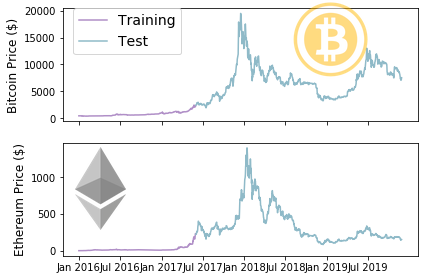

In [16]:

split_date = '2017-06-01'
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(market_prices[market_prices['Date'] < split_date]['Date'],
         market_prices[market_prices['Date'] < split_date]['bt_Close'], 
         color='#B08FC7', label='Training')
ax1.plot(market_prices[market_prices['Date'] >= split_date]['Date'],
         market_prices[market_prices['Date'] >= split_date]['bt_Close'], 
         color='#8FBAC8', label='Test')
ax2.plot(market_prices[market_prices['Date'] < split_date]['Date'],
         market_prices[market_prices['Date'] < split_date]['eth_Close'], 
         color='#B08FC7')
ax2.plot(market_prices[market_prices['Date'] >= split_date]['Date'],
         market_prices[market_prices['Date'] >= split_date]['eth_Close'], color='#8FBAC8')
ax1.set_xticklabels('')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
plt.tight_layout()
ax1.legend(bbox_to_anchor=(0.03, 1), loc=2, borderaxespad=0., prop={'size': 14})
fig.figimage(bitcoin_im.resize((int(bitcoin_im.size[0]*0.25), int(bitcoin_im.size[1]*0.25)), Image.ANTIALIAS), 
             250, 180, zorder=3,alpha=.5)
fig.figimage(eth_im.resize((int(eth_im.size[0]*0.25), int(eth_im.size[1]*0.25)), Image.ANTIALIAS), 
             75, 50, zorder=3,alpha=.5)
plt.show()

Then, a simple lag model was implemented to see how well the initial model had performed. It is the most basic model we can test, where the model is essentially creating tomorrow's data from today's data. This is how we'd define such a model in mathematical terms:

$$\begin{align}
PredPrice_{t} &amp; = ActualPrice_{t-1}
\end{align}$$

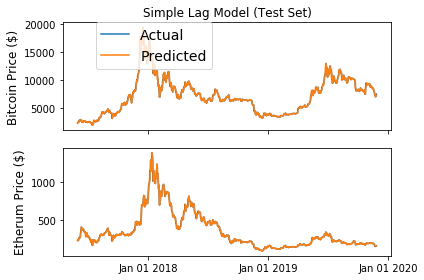

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[market_prices['Date']>= dt.datetime.strptime(split_date, '%Y-%m-%d') - 
                      dt.timedelta(days=1)]['bt_Close'][1:].values, label='Predicted')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.set_title('Simple Lag Model (Test Set)')
ax2.set_ylabel('Etherum Price ($)',fontsize=12)
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[market_prices['Date']>= dt.datetime.strptime(split_date, '%Y-%m-%d') - 
                      dt.timedelta(days=1)]['eth_Close'][1:].values, label='Predicted')
fig.tight_layout()
plt.show()


### 1.3.2 Implementing Random Walks

Traditionally, stock markets follow and extended version of the lag model, which is random walks. 

$$\begin{align}
PredPrice_{t} &amp; = ActualPrice_{t-1} * \epsilon, \epsilon \sim N(\mu, \sigma)
\end{align}$$

We'll determine μ and σ from the training sets and apply the random walk model to the Bitcoin and Ethereum test sets.

This is a histogram of the price changes just so that there are not eye-catching anomalies, assuring that there is a normal distribution of data.

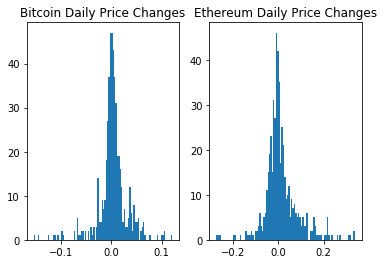

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values, bins=100)
ax2.hist(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values, bins=100)
ax1.set_title('Bitcoin Daily Price Changes')
ax2.set_title('Ethereum Daily Price Changes')
plt.show()

#### 1.3.2.1 Single Points Random Walk

Here, we implement the single-point random walk. 

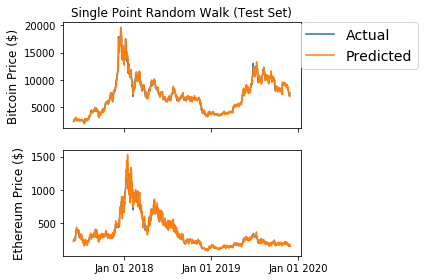

In [19]:
np.random.seed(202)
bt_r_walk_mean, bt_r_walk_sd = np.mean(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values), \
                         np.std(market_prices[market_prices['Date']< split_date]['bt_day_diff'].values)
bt_random_steps = np.random.normal(bt_r_walk_mean, bt_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
eth_r_walk_mean, eth_r_walk_sd = np.mean(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values), \
                         np.std(market_prices[market_prices['Date']< split_date]['eth_day_diff'].values)
eth_random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
     market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
      market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['bt_Close'].values[1:] * 
     (1+bt_random_steps), label='Predicted')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
     market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
      market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
     (1+eth_random_steps), label='Predicted')
ax1.set_title('Single Point Random Walk (Test Set)')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

It is observed that the predicted value almost distinctly models the actual curve. This is somewhat promising because it shows that the model has potential. However, this could also mean that the model is not well adjusted and is very dependent on the dataset, meaning that the performance of prediction could possibly not be as efficient.

#### 1.3.2.2 Full Interval Random Walk

Here, the Random Walk is implemented on the full interval.

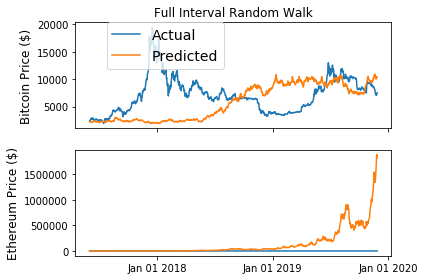

In [20]:
bt_random_walk = []
eth_random_walk = []
for n_step, (bt_step, eth_step) in enumerate(zip(bt_random_steps, eth_random_steps)):
    if n_step==0:
        bt_random_walk.append(market_prices[market_prices['Date']< split_date]['bt_Close'].values[0] * (bt_step+1))
        eth_random_walk.append(market_prices[market_prices['Date']< split_date]['eth_Close'].values[0] * (eth_step+1))
    else:
        bt_random_walk.append(bt_random_walk[n_step-1] * (bt_step+1))
        eth_random_walk.append(eth_random_walk[n_step-1] * (eth_step+1))
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels('')
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['bt_Close'].values, label='Actual')
ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         bt_random_walk[::-1], label='Predicted')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         eth_random_walk[::-1], label='Predicted')

ax1.set_title('Full Interval Random Walk')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.tight_layout()
plt.show()

As partially expected from above, the model does not work as well. For Bitcoin, it somewhat mapped the very beginning and some trends near the tail. However, for Ethereum, as expected, the model was too dependent on the data and shows that the conditioning in this process is not the best. However, it was very computationally cheap.

Noting Ethereum above, it was of interest to observe the discreptancies between Single Point and Full Interval Random Walks. By observing how the plots changed via random seed, it faciliated the conclusions of that the issues of the model. Some portions of ipywidgets were imported for easier syntax and the overall package was imported as well to create a slider for observation of the effects of changing the random seed onto the prediction model.

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_func(freq):
    np.random.seed(freq)
    random_steps = np.random.normal(eth_r_walk_mean, eth_r_walk_sd, 
                (max(market_prices['Date']).to_pydatetime() - dt.datetime.strptime(split_date, '%Y-%m-%d')).days + 1)
    random_walk = []
    for n_step,i in enumerate(random_steps):
        if n_step==0:
            random_walk.append(market_prices[market_prices['Date']< split_date]['eth_Close'].values[0] * (i+1))
        else:
            random_walk.append(random_walk[n_step-1] * (i+1))
    fig, (ax1, ax2) = plt.subplots(2,1)
    ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
    ax1.set_xticklabels('')
    ax2.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
    ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
    ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
         market_prices[market_prices['Date']>= split_date]['eth_Close'].values, label='Actual')
    ax1.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps), label='Predicted')
    ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
          market_prices[(market_prices['Date']+ dt.timedelta(days=1))>= split_date]['eth_Close'].values[1:] * 
         (1+random_steps))
    ax2.plot(market_prices[market_prices['Date']>= split_date]['Date'],
             random_walk[::-1])
    ax1.set_title('Single Point Random Walk')
    ax1.set_ylabel('')
    # for static figures, you may wish to insert the random seed value
#    ax1.annotate('Random Seed: %d'%freq, xy=(0.75, 0.2),  xycoords='axes fraction',
#            xytext=(0.75, 0.2), textcoords='axes fraction')
    ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
    ax2.set_title('Full Interval Random Walk')
    fig.text(0.0, 0.5, 'Ethereum Price ($)', va='center', rotation='vertical',fontsize=12)
    plt.tight_layout()
#    plt.savefig('image%d.png'%freq, bbox_inches='tight')
    plt.show()
    
interact(plot_func, freq =widgets.IntSlider(min=200,max=210,step=1,value=205, description='Random Seed:'))

interactive(children=(IntSlider(value=205, description='Random Seed:', max=210, min=200), Output()), _dom_clas…

<function __main__.plot_func(freq)>

Notice how that the Single Point Random Walk is always accurate. This model is misleading, however, and detrimental for the investor. 

### 1.3.3 Long Short Term Memory Model

Here, we reorganize the larger data frame. We create new columns such as "volatility" and "close off high" to show simply the difference between high and low price divided by the opening price and represent the gap between the closing price and price high for that day, where values of -1 and 1 mean the closing price was equal to the daily low or daily high, respectively. Then, the dates were reorgainized to show the passage of time on the values.

In [22]:
for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open'])}
    market_prices = market_prices.assign(**kwargs)

In [23]:
model_data = market_prices[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close','Volume','close_off_high','volatility']]]
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1426,2016-01-01,434.33,36278900,-0.560137,0.020268,0.948024,206062,-0.418477,0.025040
1425,2016-01-02,433.44,30096600,0.250597,0.009641,0.937124,255504,0.965898,0.034913
1424,2016-01-03,430.01,39633800,-0.173865,0.020827,0.971905,407632,-0.317885,0.060792
1423,2016-01-04,433.09,38477500,-0.474265,0.012649,0.954480,346245,-0.057657,0.047943
1422,2016-01-05,431.96,34522600,-0.013333,0.010391,0.950176,219833,0.697930,0.025236


We now eliminate the date columns.

In [24]:
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [25]:
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close','Volume']]

LSTM_training_inputs = []

for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1

In [26]:
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close'][window_len:].values/test_set['eth_Close'][:-window_len].values)-1

LSTM_training_inputs[0]

,bt_Close,bt_Volume,bt_close_off_high,bt_volatility,eth_Close,eth_Volume,eth_close_off_high,eth_volatility
1426,0.000000,0.000000,-0.560137,0.020268,0.000000,0.000000,-0.418477,0.025040
1425,-0.002049,-0.170410,0.250597,0.009641,-0.011498,0.239937,0.965898,0.034913
1424,-0.009946,0.092475,-0.173865,0.020827,0.025190,0.978201,-0.317885,0.060792
1423,-0.002855,0.060603,-0.474265,0.012649,0.006810,0.680295,-0.057657,0.047943
1422,-0.005457,-0.048411,-0.013333,0.010391,0.002270,0.066829,0.697930,0.025236
1421,-0.012019,-0.061645,-0.003623,0.012782,0.002991,0.498534,-0.214540,0.026263
1420,0.054613,1.413585,-0.951499,0.069045,-0.006349,2.142074,0.681644,0.040587
1419,0.043515,0.570968,0.294196,0.032762,0.040890,1.647747,-0.806717,0.055274
1418,0.030576,-0.110282,0.814194,0.017094,0.040937,0.098121,-0.411897,0.019021
1417,0.031451,-0.007801,-0.919598,0.017758,0.054014,0.896944,-0.938235,0.025266


The data is then created for training and test inputs for training and testing the model for the LSTM model. It is in the form of a numpy array. Deep learning models in general prefer to have the data in between the integers -1 and 1. Looking at those columns, some values range between -1 and 1, while others are on the scale of millions. In order to do this, normalization is required to allow for the inputs to become somewhat consistent. The off_high and volatility columns are fine as they are, but the others needed to be converted.

In [27]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)

LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [28]:
LSTM_training_inputs

array([[[ 0.00000000e+00,  0.00000000e+00, -5.60137457e-01, ...,
          0.00000000e+00, -4.18477331e-01,  2.50398410e-02],
        [-2.04913315e-03, -1.70410349e-01,  2.50596659e-01, ...,
          2.39937495e-01,  9.65897754e-01,  3.49134105e-02],
        [-9.94635415e-03,  9.24752404e-02, -1.73864895e-01, ...,
          9.78200736e-01, -3.17884625e-01,  6.07919610e-02],
        ...,
        [ 4.35152994e-02,  5.70968249e-01,  2.94196131e-01, ...,
          1.64774679e+00, -8.06716561e-01,  5.52743457e-02],
        [ 3.05758294e-02, -1.10281734e-01,  8.14193548e-01, ...,
          9.81209539e-02, -4.11896506e-01,  1.90207823e-02],
        [ 3.14507402e-02, -7.80067753e-03, -9.19597990e-01, ...,
          8.96943638e-01, -9.38235412e-01,  2.52659156e-02]],

       [[ 0.00000000e+00,  0.00000000e+00,  2.50596659e-01, ...,
          0.00000000e+00,  9.65897754e-01,  3.49134105e-02],
        [-7.91343669e-03,  3.16886293e-01, -1.73864895e-01, ...,
          5.95403594e-01, -3.17884625e

#### 1.3.3.1 Implementing a Single Timepoint Model with Training and Testing

This is the LSTM model. The models for Bitcoin and Ethereum respectively will use previous data to predict the next day's closing price of a specific coin. We must decide how many previous days it will have access to. In this model, the number of previous days is quite arbitrary, so 10 days was partially randomly chosen. The data frames were built conntaining of 10 consecutive days of data, such that the very first window contains of the 0-9th rows of the training input, the second consists of rows 1-10, and so forth. Picking a small window size implies that more windows can be added into the model; the downside is that the model may not have sufficient information to detect complex long term behaviours. if they exist.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout


def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In running the LSTM model, a random seed was required to allow for reproducibility, or else the model would vary each time it was executed. The model then used the function above to initialize the model architecture with having the model output being the next price normalized to the tenth previous closing price. Then the model was trained and stored under eth_history, as we were first testing this with Ethereum data, and this contains the information on the training error for each epoch.

In [30]:
np.random.seed(202)
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
LSTM_training_outputs = (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Train on 507 samples
Epoch 1/50
507/507 - 3s - loss: 0.1630
Epoch 2/50
507/507 - 1s - loss: 0.1142
Epoch 3/50
507/507 - 2s - loss: 0.1066
Epoch 4/50
507/507 - 1s - loss: 0.0888
Epoch 5/50
507/507 - 1s - loss: 0.0889
Epoch 6/50
507/507 - 1s - loss: 0.0841
Epoch 7/50
507/507 - 2s - loss: 0.0827
Epoch 8/50
507/507 - 2s - loss: 0.0817
Epoch 9/50
507/507 - 2s - loss: 0.0827
Epoch 10/50
507/507 - 2s - loss: 0.0795
Epoch 11/50
507/507 - 2s - loss: 0.0745
Epoch 12/50
507/507 - 2s - loss: 0.0773
Epoch 13/50
507/507 - 2s - loss: 0.0735
Epoch 14/50
507/507 - 1s - loss: 0.0723
Epoch 15/50
507/507 - 2s - loss: 0.0740
Epoch 16/50
507/507 - 2s - loss: 0.0704
Epoch 17/50
507/507 - 2s - loss: 0.0682
Epoch 18/50
507/507 - 2s - loss: 0.0718
Epoch 19/50
507/507 - 2s - loss: 0.0714
Epoch 20/50
507/507 - 2s - loss: 0.0681
Epoch 21/50
507/507 - 2s - loss: 0.0673
Epoch 22/50
507/507 - 1s - loss: 0.0671
Epoch 23/50
507/507 - 2s - loss: 0.0668
Epoch 24/50
507/507 - 1s - loss: 0.0710
Epoch 25/50
507/507 - 1s - l

The epoch error can be graphed for the observation of MAE based on the number of epochs. It is expected that the training error should decrease over time.

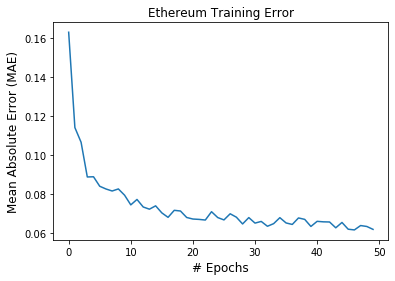

In [31]:
plt.plot(eth_history.epoch, eth_history.history['loss'])
plt.title('Ethereum Training Error')
plt.ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.xlabel('# Epochs',fontsize=12)
plt.show()

LSTM model has now been created to predict tomorrow's Ethereum closing price. TO observe the model's performance, it is expected to start by examining its performance on the training set, the data before July 2017. That number below the code represents the model's MAE on the training set after the 50th training iteration or epoch. Instead of relative changes, the model can be viewed as an output of daily closing prices.

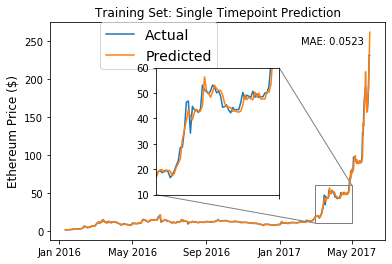

In [32]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,5,9]])
ax1.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close'].values[window_len:])/(training_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 3.35, loc=10) # zoom-factor: 3.35, location: centre
axins.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([dt.date(2017, 3, 1), dt.date(2017, 5, 1)])
axins.set_ylim([10,60])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

It is not that wild of a guess that the model is not too far off from the actual data. The model could access the source of its error and adjust itself accordingly while performing its learning and as a matter of fact, it is quite possible to achieve training errors that are very close to zero. It is also possible to attempt to implement more neurons and train for a larger number of epochs, but the probability of overfitting could occur, where essentially, the noise or unnecessary information is being predicted, which is not desired. Therefore, Dropout() was included in the model such that it could lower the chance of that occurring in the model. The performance of the test dataset is new data for the model, meaning that the observations of the model should be more heavily analyzed here.

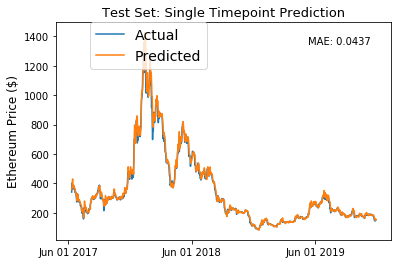

In [33]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([dt.date(2017+i,6,1) for i in range(3)])
ax1.set_xticklabels([dt.date(2017+i,6,1).strftime('%b %d %Y')  for i in range(3)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['eth_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
            (test_set['eth_Close'].values[window_len:])/(test_set['eth_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

Caveats aside about the misleading nature of single point predictions, the model seems to have performed well on the unseen test set. The most obvious flaw is that it fails to detect the inevitable downturn when the eth price suddenly shoots up (e.g around mid-March). In fact, this is somewhat a persistent failure and it's just more apparent at these spikes. Furthermore, the model seems to be systemically overestimating the future value of Ether slightly, as the predicted line near always runs higher than the actual line most post cases. This could possibly be because of the fluctuations of the data lead to the increase of Ethereum, and so the neural network perceived that to be the trend. Building a similar LSTM model for Bitcoin is also possible and the test set predictions are plotted below.

In [34]:
np.random.seed(202)
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Train on 507 samples
Epoch 1/50
507/507 - 3s - loss: 0.0967
Epoch 2/50
507/507 - 1s - loss: 0.0646
Epoch 3/50
507/507 - 1s - loss: 0.0474
Epoch 4/50
507/507 - 1s - loss: 0.0414
Epoch 5/50
507/507 - 1s - loss: 0.0391
Epoch 6/50
507/507 - 1s - loss: 0.0354
Epoch 7/50
507/507 - 1s - loss: 0.0344
Epoch 8/50
507/507 - 1s - loss: 0.0311
Epoch 9/50
507/507 - 1s - loss: 0.0306
Epoch 10/50
507/507 - 1s - loss: 0.0301
Epoch 11/50
507/507 - 1s - loss: 0.0286
Epoch 12/50
507/507 - 1s - loss: 0.0283
Epoch 13/50
507/507 - 1s - loss: 0.0274
Epoch 14/50
507/507 - 1s - loss: 0.0264
Epoch 15/50
507/507 - 1s - loss: 0.0278
Epoch 16/50
507/507 - 2s - loss: 0.0268
Epoch 17/50
507/507 - 1s - loss: 0.0268
Epoch 18/50
507/507 - 1s - loss: 0.0257
Epoch 19/50
507/507 - 1s - loss: 0.0251
Epoch 20/50
507/507 - 1s - loss: 0.0258
Epoch 21/50
507/507 - 1s - loss: 0.0250
Epoch 22/50
507/507 - 1s - loss: 0.0253
Epoch 23/50
507/507 - 1s - loss: 0.0262
Epoch 24/50
507/507 - 1s - loss: 0.0250
Epoch 25/50
507/507 - 1s - l

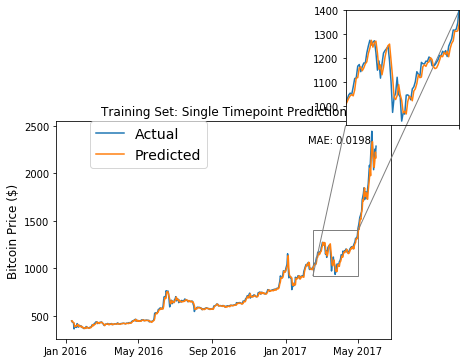

In [35]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,5,9]])
ax1.set_xticklabels([dt.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
            (training_set['bt_Close'].values[window_len:])/(training_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
# figure inset code taken from http://akuederle.com/matplotlib-zoomed-up-inset
axins = zoomed_inset_axes(ax1, 2.52, loc=10, bbox_to_anchor=(400, 307)) # zoom-factor: 2.52, location: centre
axins.set_xticks([dt.date(i,j,1) for i in range(2013,2020) for j in [1,5,9]])
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['bt_Close'][window_len:], label='Actual')
axins.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
axins.set_xlim([dt.date(2017, 2, 15), dt.date(2017, 5, 1)])
axins.set_ylim([920, 1400])
axins.set_xticklabels('')
mark_inset(ax1, axins, loc1=1, loc2=3, fc="none", ec="0.5")
plt.show()

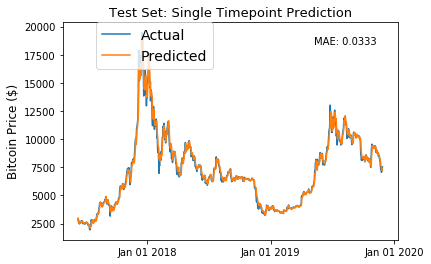

In [36]:
fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(12)])
ax1.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:],
         test_set['bt_Close'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][10:],
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close'].values[window_len:])/(test_set['bt_Close'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()


As good single timepoint predictions seem, in many cases can they be deceptive. Upon observation, the graph produced slightly mirrors the data of previous values. This model partially recreated an autoregressive model of some order p, mathematically denoted as 

$$\begin{align}
PredPrice_{t} &amp; = \phi_0 + \phi_1*Price_{t-1} + \ldots + \phi_p*Price_{t-p} + \epsilon_t, \ \epsilon_t \sim N(0, \sigma)\
\end{align}$$

#### 1.3.3.2 LSTM Model Training and Testing

The good news is that AR models are commonly employed in time series tasks (e.g. stock market prices), so the LSTM model appears to have landed on a sensible solution. The bad news is that it's a waste of the LSTM capabilities, which instead means that building a much simpler AR model could have probably achieved similar results in much less time.

Now, below, the model of a predicted range of five days is created for both cryptocurrencies. The MAE as time increases is also plotted.

In [37]:
np.random.seed(202)
pred_range = 5
eth_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
LSTM_training_outputs = []
for i in range(window_len, len(training_set['eth_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['eth_Close'][i:i+pred_range].values/
                                  training_set['eth_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
eth_history = eth_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Train on 502 samples
Epoch 1/50
502/502 - 3s - loss: 0.2075
Epoch 2/50
502/502 - 2s - loss: 0.1540
Epoch 3/50
502/502 - 2s - loss: 0.1427
Epoch 4/50
502/502 - 2s - loss: 0.1354
Epoch 5/50
502/502 - 2s - loss: 0.1316
Epoch 6/50
502/502 - 2s - loss: 0.1280
Epoch 7/50
502/502 - 2s - loss: 0.1232
Epoch 8/50
502/502 - 2s - loss: 0.1218
Epoch 9/50
502/502 - 2s - loss: 0.1245
Epoch 10/50
502/502 - 2s - loss: 0.1219
Epoch 11/50
502/502 - 2s - loss: 0.1228
Epoch 12/50
502/502 - 2s - loss: 0.1200
Epoch 13/50
502/502 - 2s - loss: 0.1214
Epoch 14/50
502/502 - 2s - loss: 0.1172
Epoch 15/50
502/502 - 2s - loss: 0.1156
Epoch 16/50
502/502 - 2s - loss: 0.1186
Epoch 17/50
502/502 - 2s - loss: 0.1165
Epoch 18/50
502/502 - 2s - loss: 0.1152
Epoch 19/50
502/502 - 2s - loss: 0.1105
Epoch 20/50
502/502 - 2s - loss: 0.1106
Epoch 21/50
502/502 - 2s - loss: 0.1108
Epoch 22/50
502/502 - 2s - loss: 0.1105
Epoch 23/50
502/502 - 2s - loss: 0.1104
Epoch 24/50
502/502 - 2s - loss: 0.1076
Epoch 25/50
502/502 - 2s - l

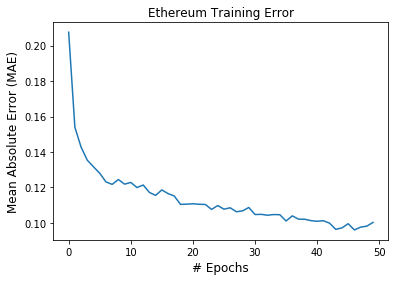

In [38]:
plt.plot(eth_history.epoch, eth_history.history['loss'])
plt.title('Ethereum Training Error')
plt.ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.xlabel('# Epochs',fontsize=12)
plt.show()

In [39]:
np.random.seed(202)
pred_range = 5
bt_model = build_model(LSTM_training_inputs, output_size=pred_range, neurons = 20)
LSTM_training_outputs = []
for i in range(window_len, len(training_set['bt_Close'])-pred_range):
    LSTM_training_outputs.append((training_set['bt_Close'][i:i+pred_range].values/
                                  training_set['bt_Close'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

Train on 502 samples
Epoch 1/50
502/502 - 3s - loss: 0.0988
Epoch 2/50
502/502 - 2s - loss: 0.0693
Epoch 3/50
502/502 - 2s - loss: 0.0564
Epoch 4/50
502/502 - 2s - loss: 0.0484
Epoch 5/50
502/502 - 2s - loss: 0.0449
Epoch 6/50
502/502 - 2s - loss: 0.0443
Epoch 7/50
502/502 - 2s - loss: 0.0434
Epoch 8/50
502/502 - 2s - loss: 0.0426
Epoch 9/50
502/502 - 2s - loss: 0.0417
Epoch 10/50
502/502 - 2s - loss: 0.0406
Epoch 11/50
502/502 - 2s - loss: 0.0396
Epoch 12/50
502/502 - 2s - loss: 0.0397
Epoch 13/50
502/502 - 2s - loss: 0.0396
Epoch 14/50
502/502 - 2s - loss: 0.0386
Epoch 15/50
502/502 - 2s - loss: 0.0386
Epoch 16/50
502/502 - 2s - loss: 0.0374
Epoch 17/50
502/502 - 2s - loss: 0.0385
Epoch 18/50
502/502 - 2s - loss: 0.0386
Epoch 19/50
502/502 - 2s - loss: 0.0375
Epoch 20/50
502/502 - 2s - loss: 0.0370
Epoch 21/50
502/502 - 2s - loss: 0.0378
Epoch 22/50
502/502 - 2s - loss: 0.0378
Epoch 23/50
502/502 - 2s - loss: 0.0379
Epoch 24/50
502/502 - 2s - loss: 0.0361
Epoch 25/50
502/502 - 2s - l

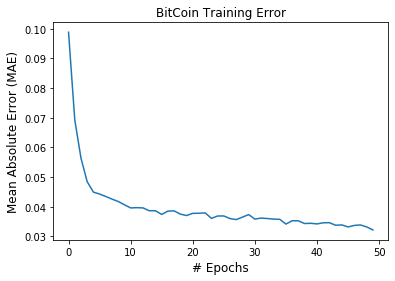

In [40]:
plt.plot(bt_history.epoch, bt_history.history['loss'])
plt.title('BitCoin Training Error')
plt.ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.xlabel('# Epochs',fontsize=12)
plt.show()

There's quite an amount of difference between the MAE of Bitcoin and Ethereum. It could be because Ethereum is less predictable, or it is flattening out (as Wall Street would say). Ethereum had its bubble around late 2017, early 2018. Afterwards, the bubble had essentially popped, and from a risk management standpoint, Ethereum seems to be erratic and with such behaviour without some sort of oscillation between increasing and decreasing. This could lead to such erratic trends and having the model to be less accurate.

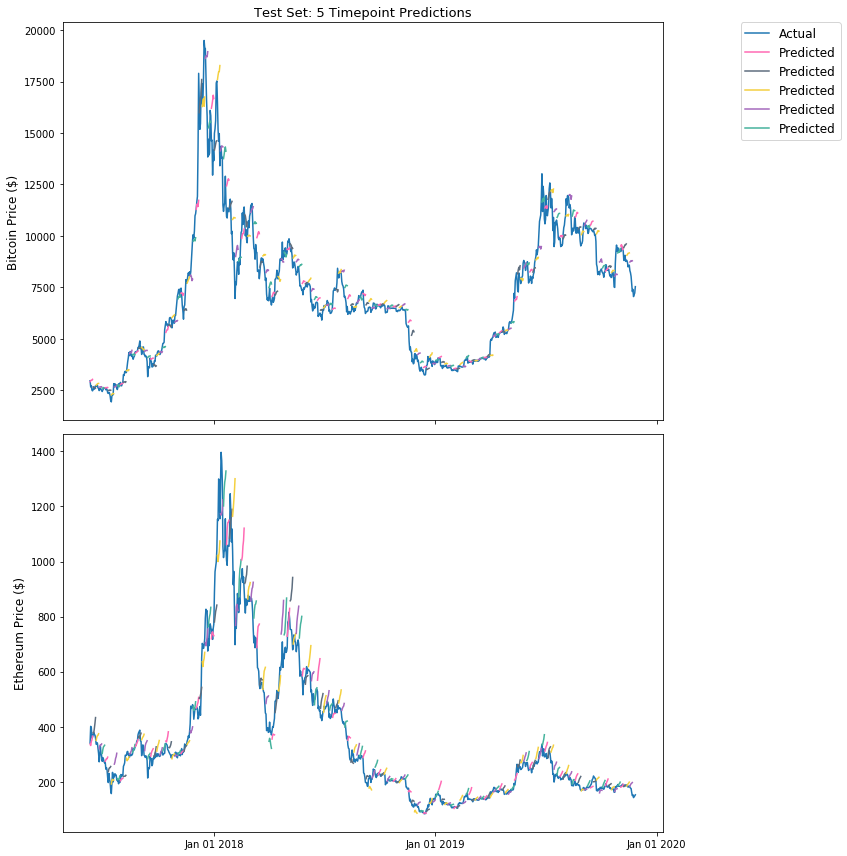

In [49]:
# little bit of reformatting the predictions to closing prices
eth_pred_prices = ((eth_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['eth_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))
bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['bt_Close'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_xticks([dt.date(2017+i,1,1) for i in range(4)])
ax2.set_xticks([dt.date(2017+i,1,1) for i in range(4)])
ax2.set_xticklabels([dt.date(2017+i,1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['bt_Close'][window_len:], label='Actual')
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['eth_Close'][window_len:], label='Actual')
for i, (eth_pred, bt_pred) in enumerate(zip(eth_pred_prices, bt_pred_prices)):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
    ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:][i*pred_range:i*pred_range+pred_range],
             eth_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.set_xticklabels('')
ax2.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(1.13, 1), loc='upper left', borderaxespad=0., prop={'size': 12})
ax1.figure.set_size_inches(12, 12)
ax2.figure.set_size_inches(12, 12)
#ax1.legend(loc='upper right', borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()

The predictions are visibly less impressive than their single point counterparts. Nevertheless, it is pleasing that the model returned somewhat nuanced behaviours (e.g. the second line on the eth graph); it didn't simply forecast prices to move uniformly in one direction, implying that there are some grounds for optimism. For Ethereum, the model was working well until after the greatest maxima peak (around January/February of 2018). From then on, the peaks had overshot the price, but after the prices decreased steadily in late 2018, predictions remained to be close again. So in general, these five day predictions seem to be a bit thrown off when the price is steadily increasing, or near a local maxima.

Moving back to the single point predictions, our deep machine artificial neural model looks somewhat decent, but so did that boring random walk model. Like the random walk model, LSTM models can be sensitive to the choice of random seed or the model weights are initially randomly assigned. So, if we want to compare the two models, we'll run each one multiple a few times to get an estimate for the model error. The error will be calculated as the absolute difference between the actual and predicted closing prices changes in the test set.

#### 1.3.3.3 Comparing MAE

The cell below was created so that there would exist 25 LSTM models for Ethereum and Bitcoin with 25 unique initializations. The models were then saved and then used to compare overall MAE between Random-Walk trials and LSTM trials. This cell took roughly five hours to run to create the respective models of each iteration containing the Ethereum and Bitcoin models. This was run twice for good measure.

In [45]:

# warning: this cell may take some time to execute
# this code builds 25 LSTM models for eth and bitcoin each (with 25 different initialisations)
# the models are then saved so you hopefully only need to run this cell once

# random seed for reproducibility
for rand_seed in range(775,800):
    print(rand_seed)
    np.random.seed(rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['eth_Close'][window_len:].values/training_set['eth_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('eth_model_randseed_%d.h5'%rand_seed)
    temp_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
    temp_model.fit(LSTM_training_inputs,
                 (training_set['bt_Close'][window_len:].values/training_set['bt_Close'][:-window_len].values)-1,
                 epochs=50, batch_size=1, verbose=0, shuffle=True)
    temp_model.save('bt_model_randseed_%d.h5'%rand_seed)

775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799


Assuming the previous cell was completed, this cell loads in the different initializations and calculates the MAE of each interation.

In [40]:
from tensorflow.keras.models import load_model

eth_preds = []
bt_preds = []
for rand_seed in range(775,785):
    temp_model = load_model('eth_model_randseed_%d.h5'%rand_seed)
    eth_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['eth_Close'].values[window_len:]/test_set['eth_Close'].values[:-window_len]-1))))
    temp_model = load_model('bt_model_randseed_%d.h5'%rand_seed)
    bt_preds.append(np.mean(abs(np.transpose(temp_model.predict(LSTM_test_inputs))-
                (test_set['bt_Close'].values[window_len:]/test_set['bt_Close'].values[:-window_len]-1))))

In [41]:
eth_random_walk_preds = []
bt_random_walk_preds = []
for rand_seed in range(775,785):
    np.random.seed(rand_seed)
    eth_random_walk_preds.append(
        np.mean(np.abs((np.random.normal(eth_r_walk_mean, eth_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['eth_Close'][window_len:])/np.array(test_set['eth_Close'][:-window_len]))))
    bt_random_walk_preds.append(
    np.mean(np.abs((np.random.normal(bt_r_walk_mean, bt_r_walk_sd, len(test_set)-window_len)+1)-
                       np.array(test_set['bt_Close'][window_len:])/np.array(test_set['bt_Close'][:-window_len]))))

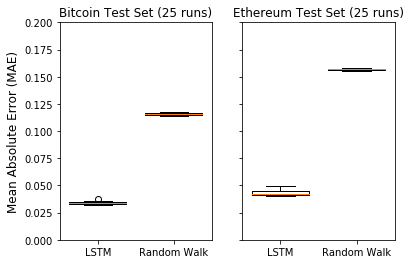

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot([bt_preds, bt_random_walk_preds],widths=0.75)
ax1.set_ylim([0, 0.2])
ax2.boxplot([eth_preds, eth_random_walk_preds],widths=0.75)
ax2.set_ylim([0, 0.2])
ax1.set_xticklabels(['LSTM', 'Random Walk'])
ax2.set_xticklabels(['LSTM', 'Random Walk'])
ax1.set_title('Bitcoin Test Set (25 runs)')
ax2.set_title('Ethereum Test Set (25 runs)')
ax2.set_yticklabels('')
ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
plt.show()

From the boxplots, it seems that despite the shortcomings of the LSTM models of both Bitcoin and especially Ethereum, it is still much better than a Random Walk, with a difference of at least 11%. The LSTM models have at most a 5% MAE, which implies that it is a somewhat accurate model, or a 95% confident model, whereas Random Walk is at most 89% confident. 

It would be more interesting to compare the LSTM model against more appropriate time series models (weighted average, autoregression, ARIMA or Facebook's Prophet algorithm). On the other hand, I'm sure it wouldn't be hard to improve our LSTM model by adding more layers and/or neurons, changing the batch size, learning rate, etc.  

A few problems arose while conducting this project. The most basic problem was purely poor execution, such as importing just keras instead of tensorflow.keras, etc. However, it also took a lot of patience the computations took a lot of memory from more computationally demanding neural networks, so LSTM had to be modelled in an attempt to go hand-in-hand in MAE for much less the cost so that this laptop could be able to run it. In addition, the models could have been slightly more complex to account for certain measures such as accounting for different market sectors and global cash flow, but I was not able to implement that. If it had been accounting, it could have helped with Ethereum's performance in LSTM.

This is obviously not giving advice on investments in cryptocurrency, but just a possible tool that one could see in action on such a subject. In addition, with the sector being even more volatile thanks to intense mining, hackers in example North Korea, and some forms of dumping. Please take caution when investing and please consult a financial advisor.

# 1.4 Conclusions

Based on the results, LSTM had a stronger performance in predicting cryptocurrency, having a range of about 3% to 5% MAE, in comparison to an 11% to 17% MAE. With cryptocurrency being so volatile and having a lot more factors in the real world that effects the market, but without even considering the factors, LSTM did decently well in predicting. However, when just trying to scope out a general trend, Random Walks is preferable because it is computationally much cheaper and does not deviate as much, except in the case of Ethereum in a full interval random walk. One could use LSTM to do their own predicting, but regardless of how well the models do, it is still not recommended to fully rely on the model and consult with a financial advisor when making decisions in investing in cryptocurrency.

# 1.5 Work Cited

1. “Cryptocurrency: Risk Management Overview.” Willis Towers Watson, https://www.willistowerswatson.com/en-US/Insights/2019/02/cryptocurrency-risk-management-overview.

2. Disparte, Dante. “Beware Of Crypto Risks - 10 Risks To Watch.” Forbes, Forbes Magazine, 21 July 2018, https://www.forbes.com/sites/dantedisparte/2018/07/21/beware-of-crypto-risks-10-risks-to-watch/#10f003085f17.

3. facebook.com/tom.demichele2. “The Basics of Risk Management and Position Sizing in Cryptocurrency.” CryptoCurrency Facts, https://cryptocurrencyfacts.com/the-basics-of-risk-management-and-position-sizing-in-cryptocurrency/.

4. Flovik, Vegard. “How (Not) to Use Machine Learning for Time Series Forecasting: Avoiding the Pitfalls.” Medium, Towards Data Science, 29 Nov. 2019, https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424.

5. “Goldman Drops Bitcoin Trading Plans for Now: Business Insider.” Reuters, Thomson Reuters, 5 Sept. 2018, https://www.reuters.com/article/us-goldman-sachs-cryptocurrency/goldman-drops-bitcoin-trading-plans-for-now-business-insider-idUSKCN1LL1M0.

6. “Long Short-Term Memory.” Wikipedia, Wikimedia Foundation, 1 Dec. 2019, https://en.wikipedia.org/wiki/Long_short-term_memory.

7. Marcek, Dusan. “[PDF] Stock Price Forecasting: Autoregressive Modelling and Fuzzy Neural Network: Semantic Scholar.” Undefined, 1 Jan. 1999, https://www.semanticscholar.org/paper/Stock-price-forecasting:-autoregressive-modelling-
Marcek/20dcf95cf48b963ede77d4e71d4cb5e418d22205

8. “Multidimensional LSTM Networks to Predict Bitcoin Price.” Jakob Aungiers, https://www.jakob-aungiers.com/articles/a/Multidimensional-LSTM-Networks-to-Predict-Bitcoin-Price.

9. Sunde, Tafirenyika, and James Zivanomoyo. “The Random Walk Hypothesis for the Zimbabwe Stock Exchange: January 1998-November 2006.” Journal of Social Sciences, vol. 4, no. 3, Jan. 2008, pp. 216–221., doi:10.3844/jssp.2008.216.221.

